For anyone else encountering this issue in VSCode embedded in a website:

On Windows: Use Shift + Insert to paste
On Mac: Typically Command + V or Option + Command + V might work as alternatives

## Introduction

https://www.youtube.com/watch?v=P1g0UZa5-sA

## Lesson Objectives
We have already learned how to create and interpret an infrastructure diagram. Now it's time to turn our designs into reality using infrastructure as code.

In this lesson, we will create network resources with CloudFormation, using the following diagram as our guide.

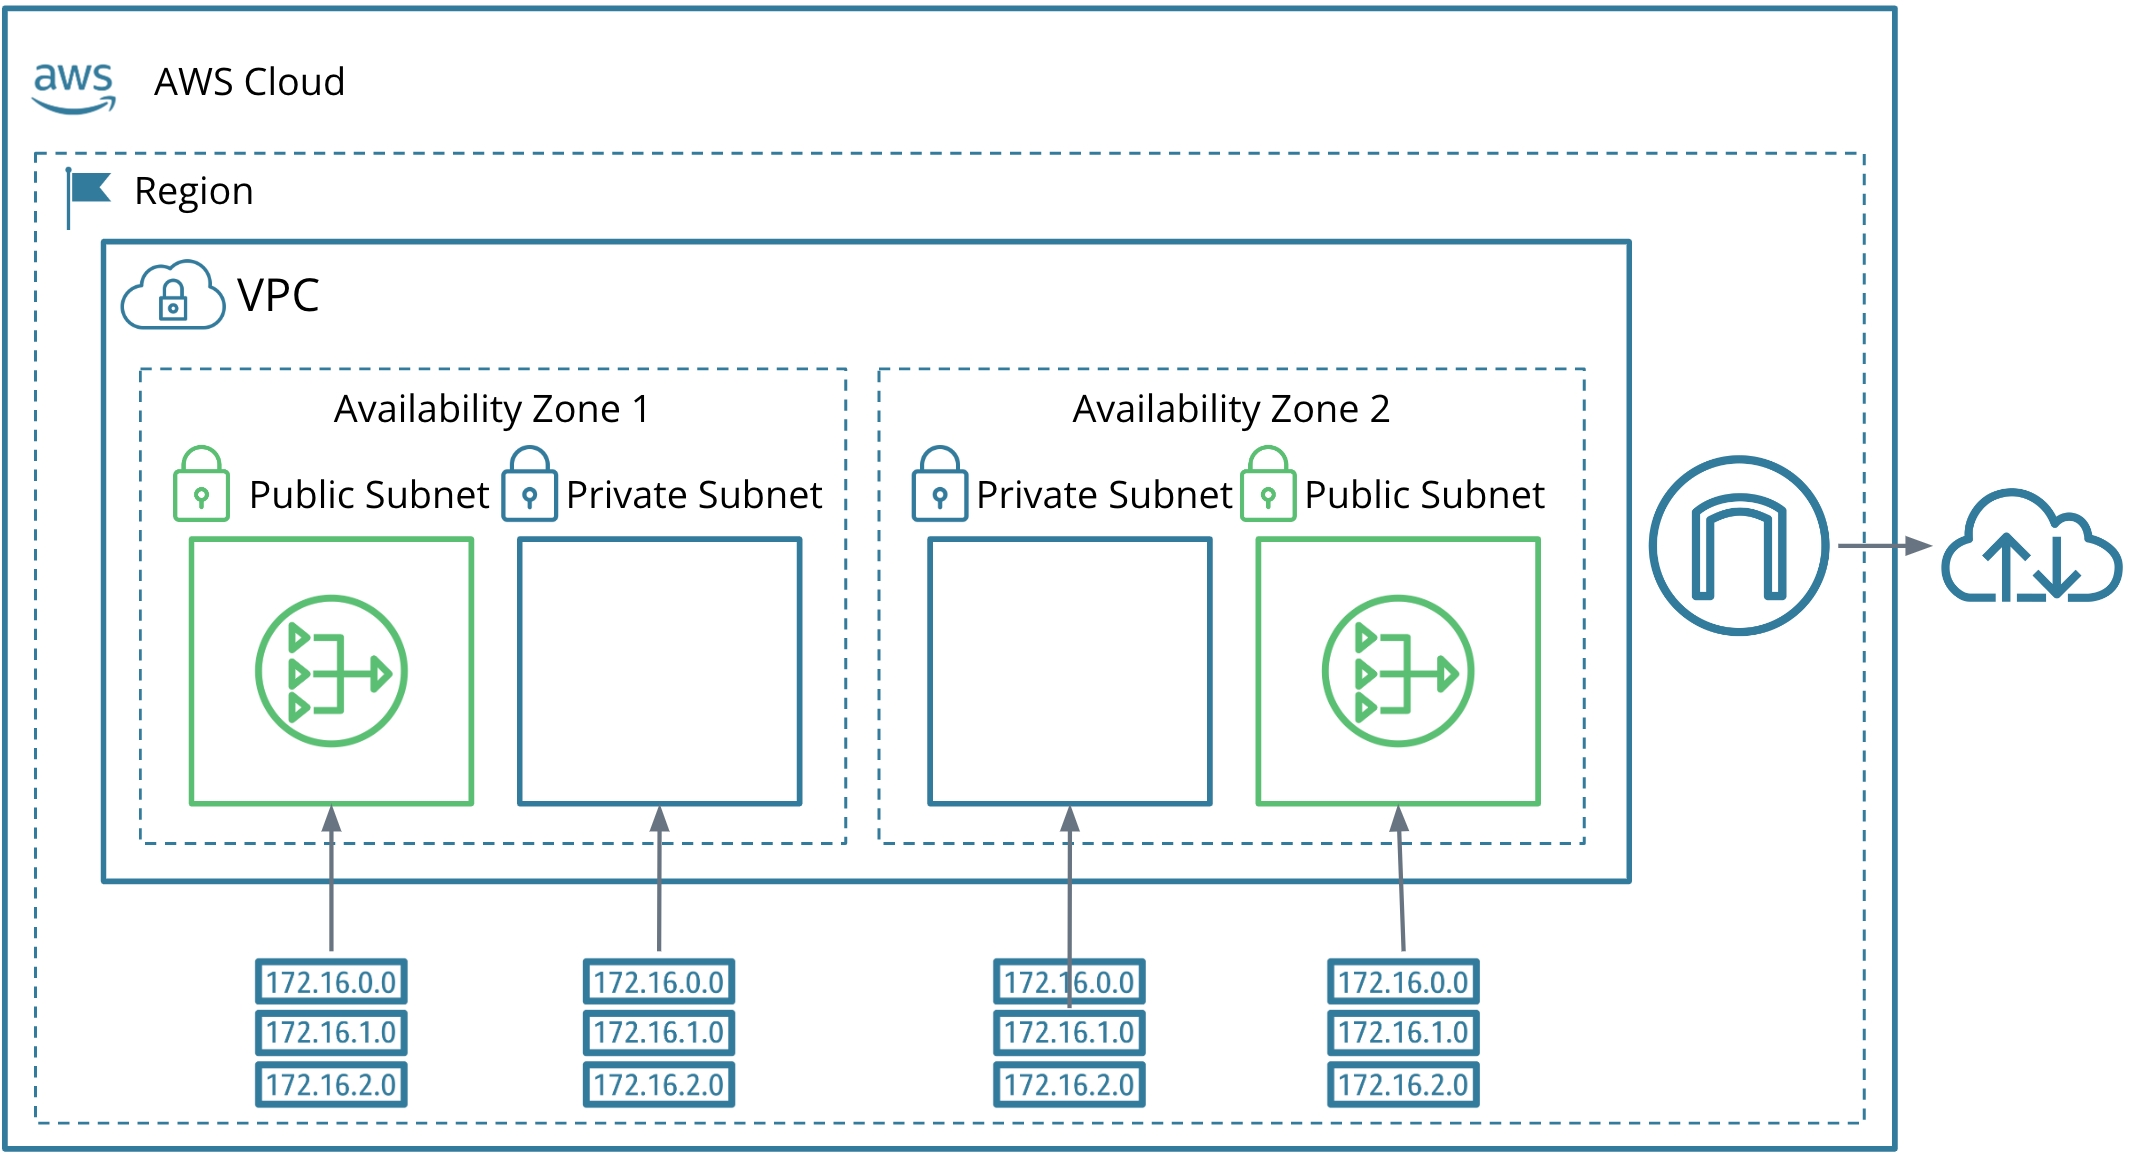

Network Infrastructure Diagram

Upon completion of this lesson, you will be able to:

Use the AWS CloudFormation CLI to trigger infrastructure deployments.
Deploy basic networking AWS resources using CloudFormation (VPC, subnets, gateways, and routing).
Parametrize your CloudFormation stacks using a JSON file.
Communicate CloudFormation stacks using template outputs.

https://github.com/udacity/cd12352-Deploy-Infrastructure-as-Code/

## Workflow and Helpers

https://www.youtube.com/watch?v=3hNeDlLpWyg

create-stack Command
Creates a CloudFormation stack from the specified template. Returns the StackId for the created stack, without waiting for the creation process to complete. Relevant arguments for this course are:

--stack-name: name for the stack, unique per region.

--template-body: file reference to the template.

--parameters: file reference to a JSON file with values for the parameters in the template.

--capabilities: additional capabilities required by your stack to execute. In order to create IAM resources, for example, we use the CAPABILITY_IAM value. And, if we're using custom names for our resources, CAPABILITY_NAMED_IAM.

--region: region in which the stack will be created.

Task List

This command creates a VPC in the us-east-1 region, using a tag name specified in a JSON parameters file.

aws cloudformation create-stack \
   --stack-name udacity-workflow-lesson \
   --template-body file://workflow-and-helpers.yml \
   --parameters file://workflow-and-helpers-parameters.json \
   --region us-east-1 

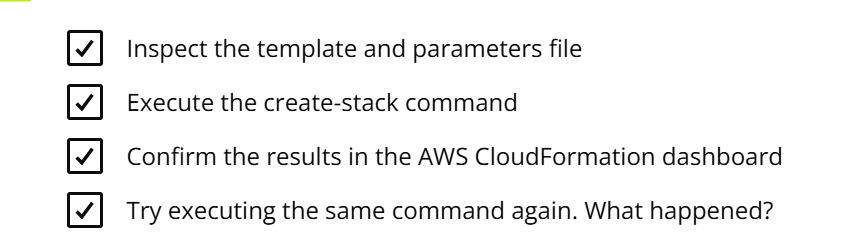

update-stack Command

Updates an existing CloudFormation stack from the specified template. Returns the StackId for the created stack, without waiting for the creation process to complete. We will use the same arguments we used for create-stack.

Task List

Let's try and modify the stack from our previous example.

aws cloudformation update-stack \
   --stack-name udacity-workflow-lesson \
   --template-body file://workflow-and-helpers.yml \
   --parameters file://workflow-and-helpers-parameters.json \
   --region us-east-1 

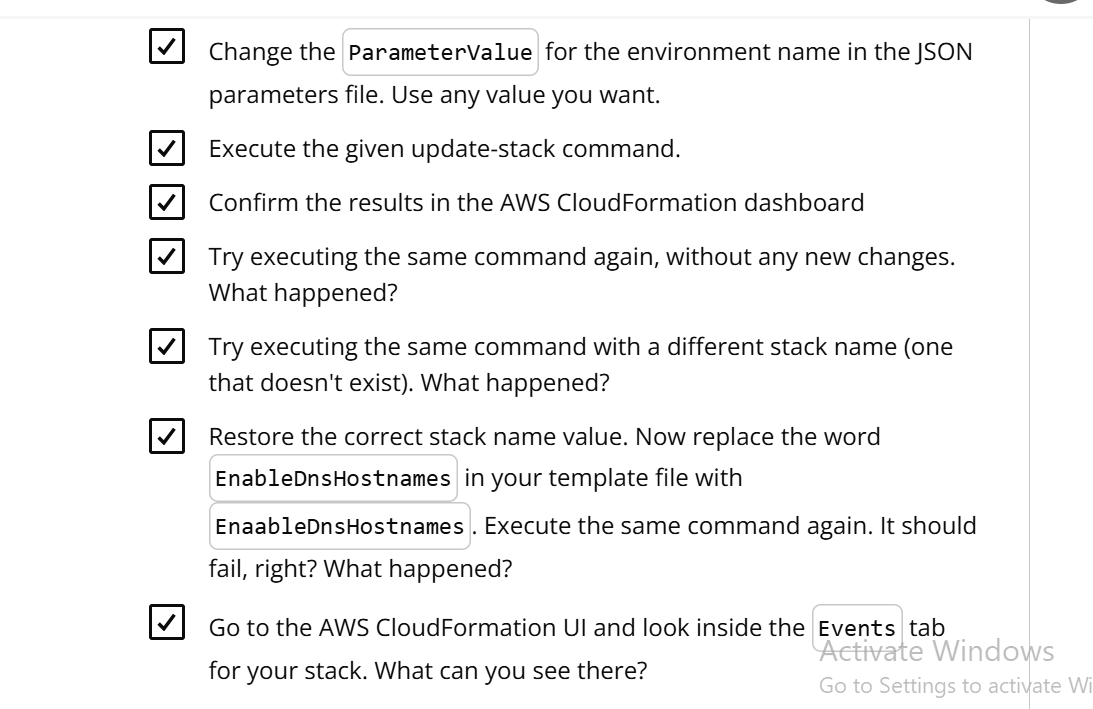

delete-stack Command
Deletes an existing CloudFormation stack from the specified template. Triggers deletion without waiting for the process to complete. We will only need to pass the stack-name and region parameters.

Task List

Now we can delete the stack from the previous examples.

In [ ]:
aws cloudformation delete-stack \
   --stack-name udacity-workflow-lesson \
   --region us-east-1 

deploy Command

This is a nice way to create your CloudFormation stacks, as this commands checks whether a stack exists with the stack name declared, and creates or updates it accordingly. It also wait for the CloudFormation execution to complete, reporting success or error.

Parameters are a bit different though, as we now pass the yml file without the file:// prefix to a parameter called template-file. Also, the parameters file argument is called parameter-overrides.

Task List

Let's use now the deploy command to recreate our stack.

aws cloudformation deploy \
   --stack-name udacity-workflow-lesson \
   --template-file workflow-and-helpers.yml \
   --parameter-overrides file://workflow-and-helpers-parameters.json \
   --region us-east-1 

The first time you execute deploy, CloudFormation creates the new stack. If you execute the command without changes to the resources, it realizes the stack is up to date and skips execution. If you execute the command again with template changes, it finds the existing stack and updates it. And if there are errors in the resource parameters, it let's you know it failed, although again after execution. Don't forget to cleanup by deleting the stack before continuing with the lesson.

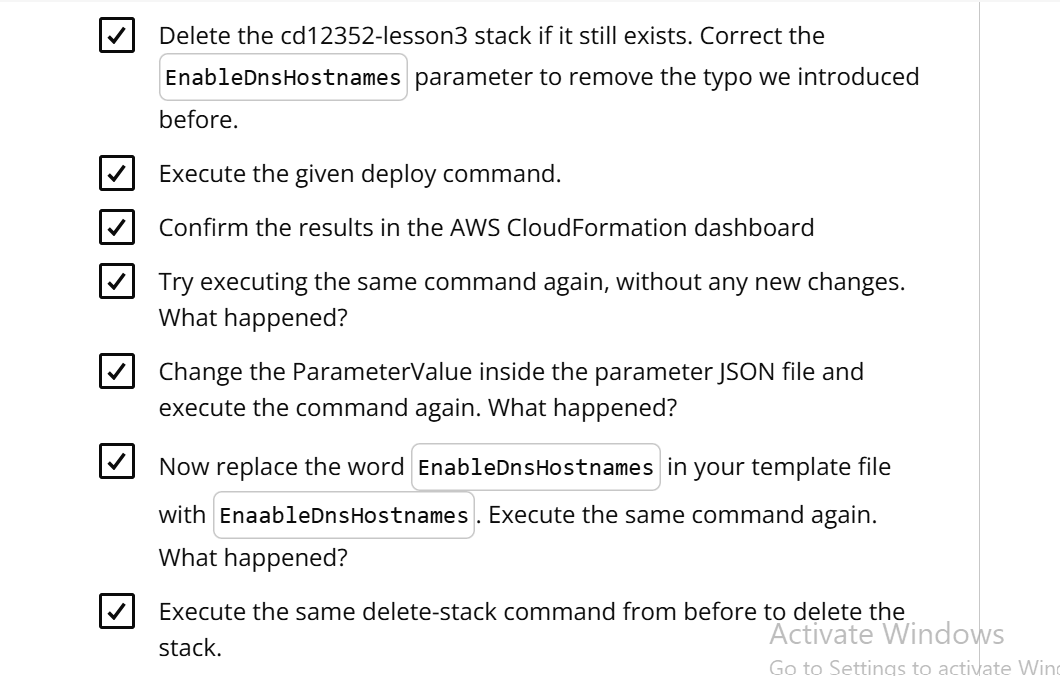

If you want to discover additional commands, you can find a link to the official CloudFormation CLI reference in the additional resources section below.

Scripting for Automation
A few scripts will help us create and update our stacks during this course. You will find them in this lesson's Workspace. They run the create, update, delete and deploy commands from this section.

create.sh: This file contains the create-stack command. Arguments: stack name, template file name, parameters file name.
update.sh: This file contains the update-stack command. update. Arguments: stack name, template file name, parameters file name.

An example execution would be:

In [ ]:
./create.sh udacity-workflow-lesson workflow-and-helpers.yml workflow-and-helpers-parameters.json

Troubleshooting permission errors
If you face permission errors while using either the create.sh or update.sh files, you will have to grant the execute permission to the owner (yourself) explicitly as:

chmod +x create.sh
chmod +x update.sh

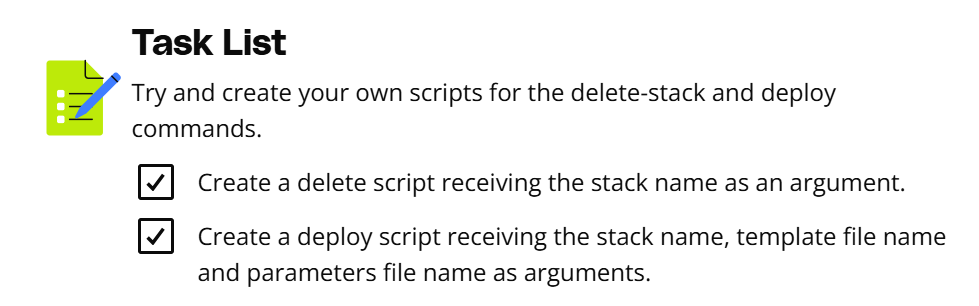

## Additional resources

https://awscli.amazonaws.com/v2/documentation/api/latest/reference/cloudformation/index.html

## VPC and Internet Gateway

## Creating Initial Files and Parameters

In the videos for this lesson, we will use the template files network.yml and network-parameters.json as a base to gradually build our own network template files: ourinfra.yml and ourinfra.json. We strongly encourage you to follow the video demonstrations as well as use the available exercises to validate your knowledge.

The commands to run for the creation and update of the demonstration stack are:

./create.sh ourdemoinfra ourinfra.yml ourinfra.json
./update.sh ourdemoinfra ourinfra.yml ourinfra.json

Let's start by creating the initial YML template and JSON parameter files for our lesson.

https://www.youtube.com/watch?v=Es5BXzhreMk

With our initial files and parameters in place, we can add the first resource to our template: the VPC. Let's see how this is done, and how this initial stack is created.

## Reviewing our VPC Creation
Next, we will add the VPC resource to our YML template. Let's review the creation process from the AWS CloudFormation dashboard.

https://www.youtube.com/watch?v=q2Nm8bdYC1A

We have just created our first resource in AWS! With the VPC in place, our next step is to create an Internet Gateway, so we can grant connectivity to our future resources.

## Reviewing our Internet Gateway Creation

Take a look at how we can add Internet Gateway resources to our template.

https://www.youtube.com/watch?v=fW6a0MZeuYg

Now that our template has both the InternetGateway and InternetGatewayAttachment resources, we can execute our update.sh command and trigger the update. Let's see how the update process looks from the AWS CloudFormation Console.

https://www.youtube.com/watch?v=VRZtsnpz2S8

Take a look at the resources block from our example:

Resources:

  VPC: 
    Type: AWS::EC2::VPC
    Properties:
      CidrBlock: !Ref VpcCIDR
      EnableDnsHostnames: true
      Tags: 
      - Key: Name 
        Value: !Ref EnvironmentName            

  InternetGateway:
    Type: AWS::EC2::InternetGateway
    Properties:
      Tags:
      - Key: Name
        Value: !Ref EnvironmentName

  InternetGatewayAttachment:
    Type: AWS::EC2::VPCGatewayAttachment
    Properties:
      InternetGatewayId: !Ref InternetGateway
      VpcId: !Ref VPC

It's important to note when connecting an Internet Gateway to a VPC, we need to define an additional resource called InternetGatewayAttachment. This attachment references both the VPC and the InternetGateway.

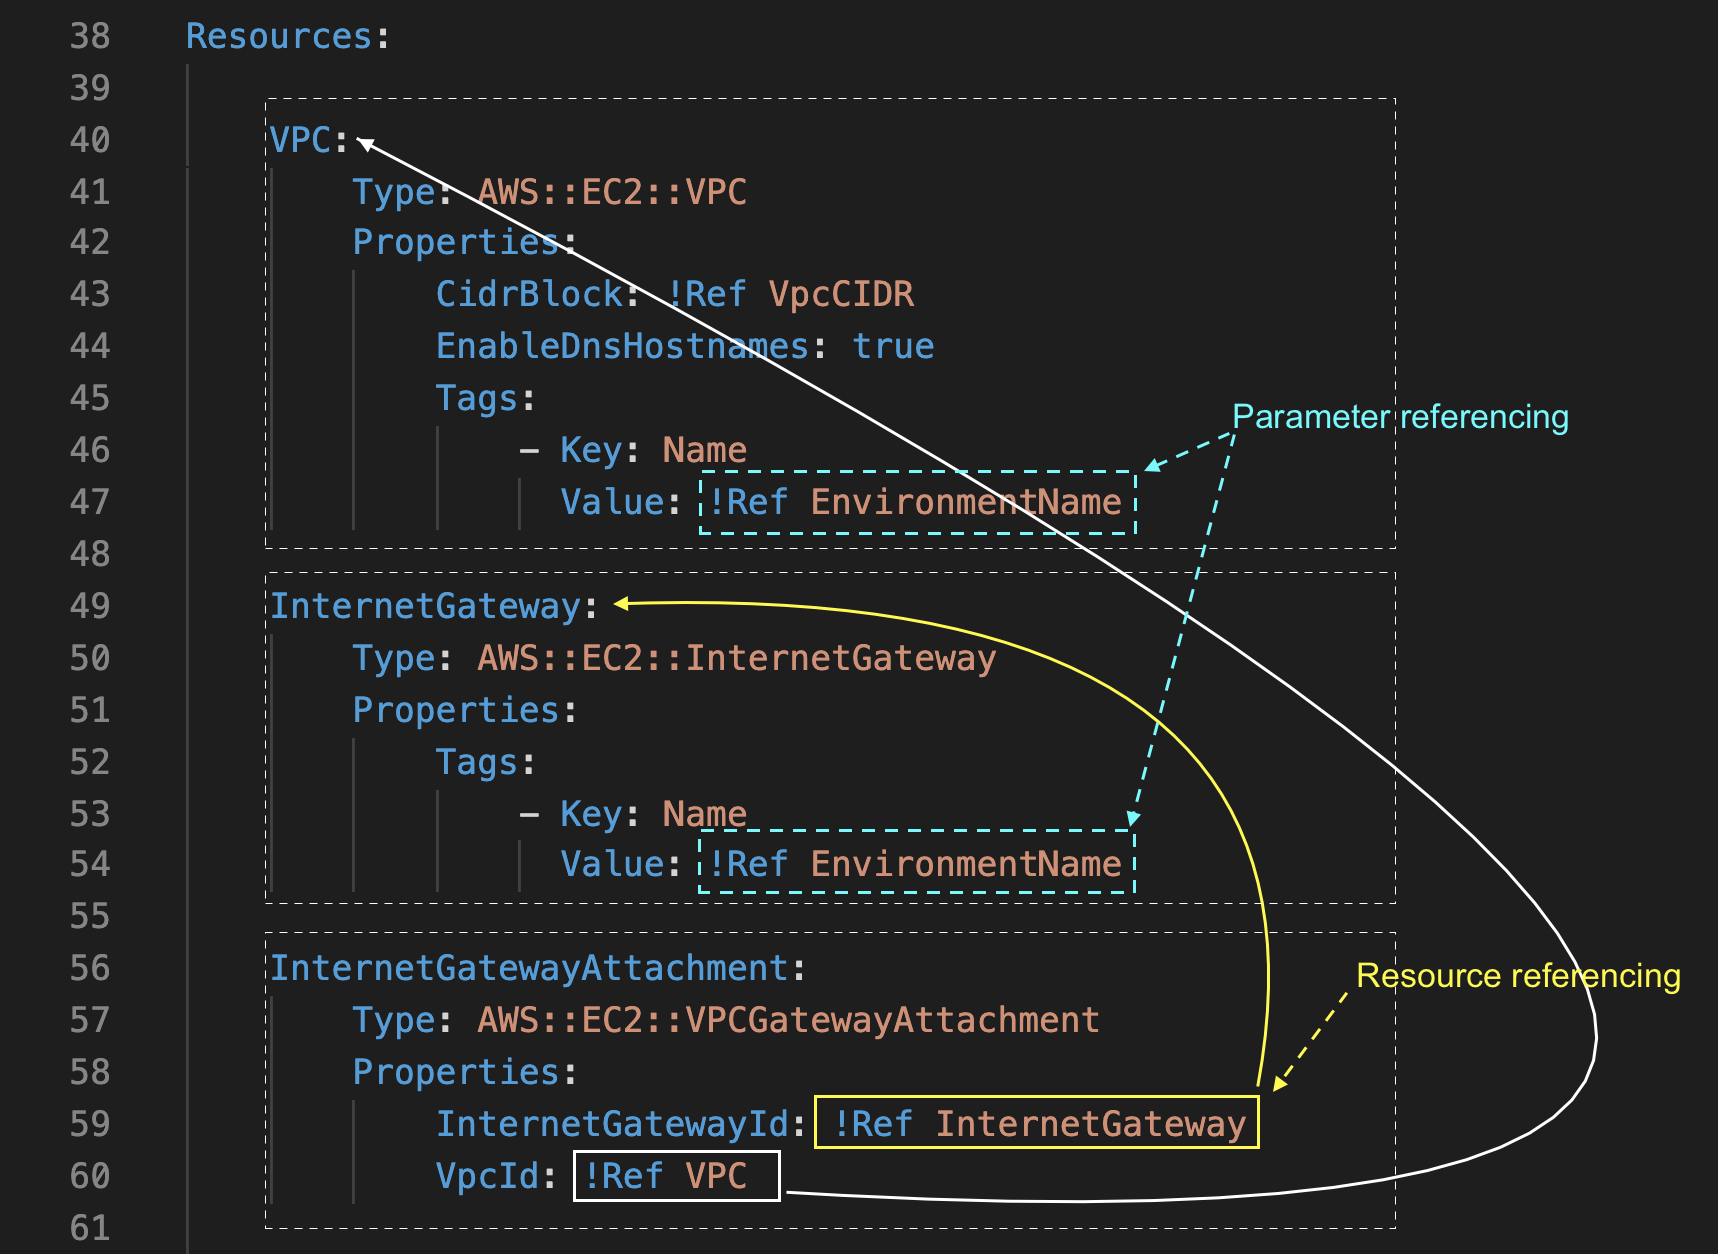

Referencing in the Resources section

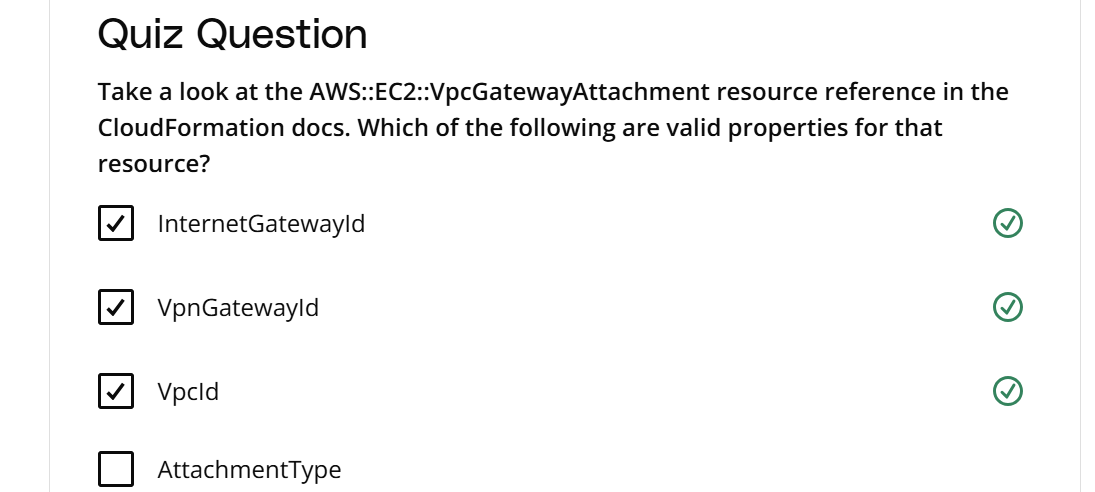

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/AWS_EC2.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-vpc.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-vpccidrblock.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-internetgateway.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-vpc-gateway-attachment.html

 ## Exercise: Creating a Network for Your Startup

You have just started a startup with your best friend, and decided to use AWS to host your newly designed web application. Since you have all the DevOps know-how required, you will be in charge of all tasks related to AWS infrastructure. You begin by creating the network environment for your application.

## Exercise Prompt
Create a CloudFormation template that declares a VPC with an Internet Gateway attached.

Follow these specific requirements:

Use a JSON parameter file for your parameters.
Declare a variable called ProjectName. Think of any project name, and use that as your value. Use only lowercase and - for your value.
Your VPC and Internet Gateway name tags must match the name of your project.
Enable DNS hostnames for your VPC (go back and look at the VPC resource reference if needed).
Your VPC's CIDR block must be 10.2.0.0/16. Pass it as a parameter called VpcCIDR in the JSON file.

## Solution: Creating a Network for Your Startup

https://www.youtube.com/watch?v=ShrQBB1NHYI

## Subnets

Using Intrinsic Functions for our Subnets

https://www.youtube.com/watch?v=g2SKj19-dpg

Two new intrinsic functions make an appearance inside our subnet resource definitions:

Intrinsic function: Select
This function returns a single object from a list of objects by index.

Intrinsic function: GetAZs
This function returns a list of Availability Zones for a specified region in alphabetical order. If the region argument is empty (''), the region in which the CloudFormation stack is created is assumed.

In this example snippet, we're getting a list of our region's Availability Zones with !GetAZs, and using the !Select function to extract a single element of that list, using a specific index as argument.

AvailabilityZone: !Select [ 0, !GetAZs '' ]

In [1]:
## Reviewing our Subnets Creation